In [1]:
# importing modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing dataframe

df = pd.read_csv('train.csv')

In [3]:
# A view at the dataframe

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### We can see the dataframe contains 891 passengers' details onboard Titanic

In [4]:
# Lets look if we have any null values in data

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### Seems like we have some null values in Age and Cabin

In [5]:
# Looking at how many null values do we actually have

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### So we have 177 null values in Age and 687 in Cabin

177 out of 891 is 19.86% and 687 out of 77.10% so we can't drop the rows given big percentage clearly.

<AxesSubplot:>

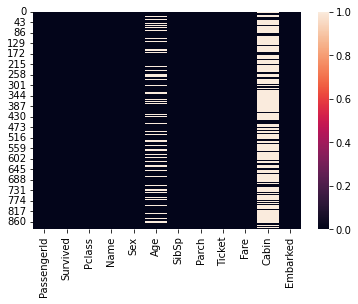

In [6]:
# Lets visualize it with heatmap

sns.heatmap(df.isnull())

So now we will use imputation and replace Null values of Age with Mean values.

In [7]:
# filling null ages with Mean

df['Age'] = df['Age'].fillna(df['Age'].mean())

Now Lets see at the null values again

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visulaization with heatmap again

<AxesSubplot:>

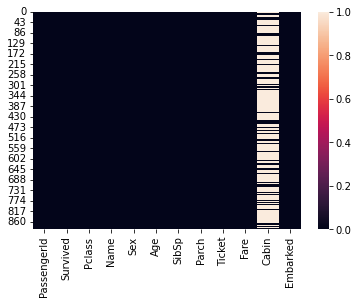

In [9]:
sns.heatmap(df.isnull())

### Now we can see there are no null values in Age and can move forward to look the data closely.

In [10]:
# Types of column we have for the data

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### The different features of our Dataset are:
1. PassengerId
2. Survived or not
3. Passenger Class
4. Name of Passenger
5. Gender of Passenger
6. Age of Passenger
7. Siblings/Spouse Boarding Titanic
8. Number of Parents Children Aboard
9. Type of Ticket they have
10. Passenger's Fare
11. Cabin
12. Embarked - where the passenger mounted from

In [11]:
# first 5 rows

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Columns, Number of Non-Null values per column and Data Type.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# Number of non-empty values, Mean, Standard Deviation, min, max, 25/50/75 percentiles.

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

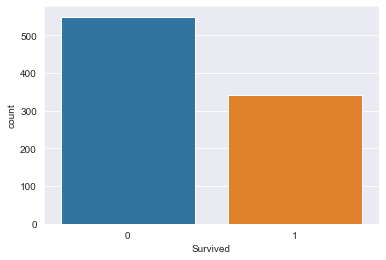

In [14]:
# Lets make a darkgrid catplot to visualize how many survived and how many died.

sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df)

It gives us an idea that the number of people Survived is around 300 and number of people died is around 500.

In [15]:
# Now lets take a look at exact numbers.

df.Survived.sum()

342

Which means the number of people who couldn't survive = (891-342) = 549

In [16]:
# Lets see how Passenger's Class affected their Survival rate

df.groupby(['Survived','Pclass'])['Survived'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

#### Shows us that Class 1 passengers had the least death rate.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

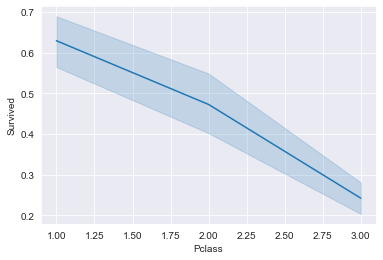

In [17]:
# Making a lineplot to see if we could find something

sns.lineplot(x='Pclass',y='Survived',data=df)

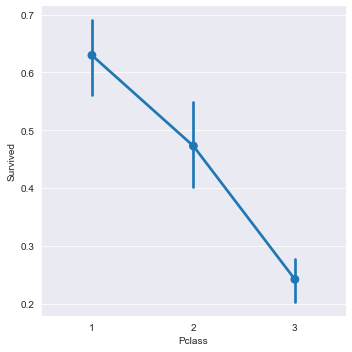

In [18]:
# Now lets make a catplot

sns.catplot(x='Pclass',y='Survived',kind='point',data=df)

In [19]:
# Lets see how passenger's Sex affected their Survival rate.

df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

It shows us Females had a higher chance of staying alive.

<AxesSubplot:xlabel='Survived', ylabel='count'>

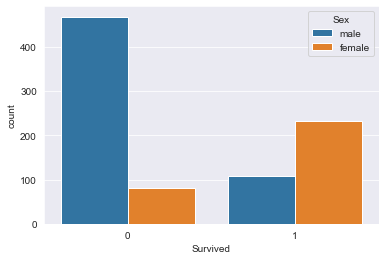

In [20]:
# Lets Make a countplot to visualize this 

sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

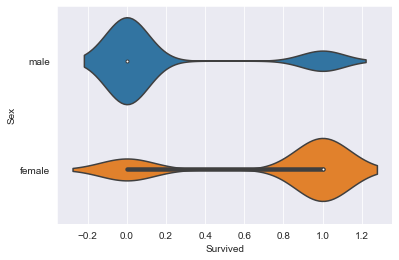

In [21]:
# Lets visualize this with Violin Plot aswell

sns.violinplot(x='Survived',y='Sex',data=df)

So the conclusion is Female had higher chances of Surviving than men.

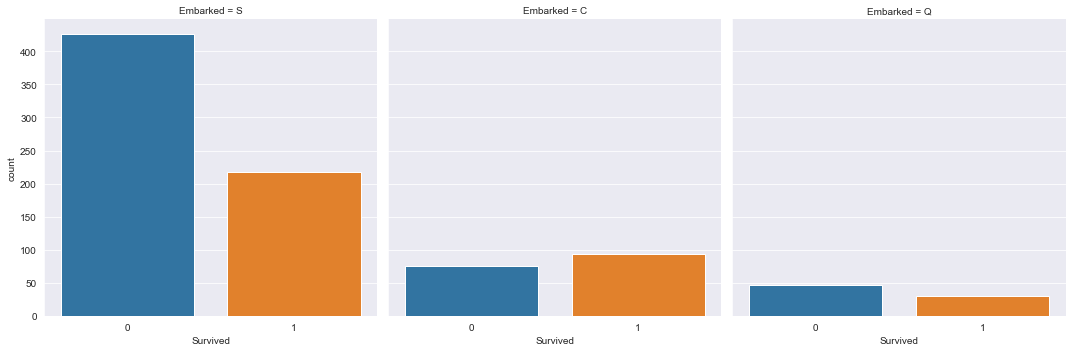

In [22]:
# Now lets see how Passenger's Embarked Status affected survival rate

sns.catplot(x='Survived',col='Embarked',kind='count',data=df)

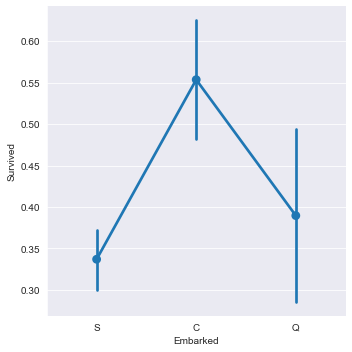

In [23]:
# Visualizing again with catplot, point kind.

sns.catplot(x='Embarked',y='Survived',kind='point',data=df)

It shows passengers with Embarked 'S' had the most death rate and Embarked 'C' had the least death rate.

<AxesSubplot:>

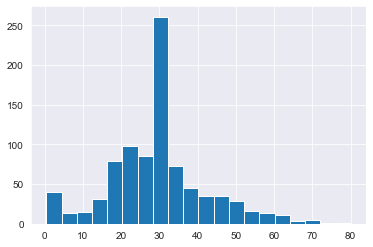

In [24]:
# Lets take a look at the age variations in dataset

df['Age'].hist(bins=20)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

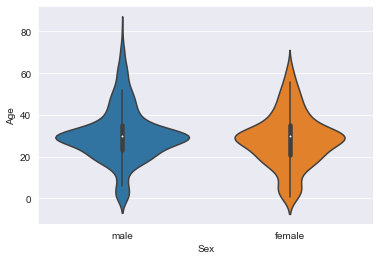

In [25]:
# Visualizing age of the passengers based on Sex

sns.violinplot(x='Sex',y='Age',data=df)

#### (But I did this after putting the mean values in Null values so technically most of the people should be ~25 yrs old)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

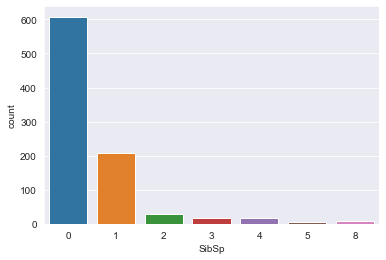

In [26]:
# Lets make a countplot to visualize Siblings and Spouses in the data

sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

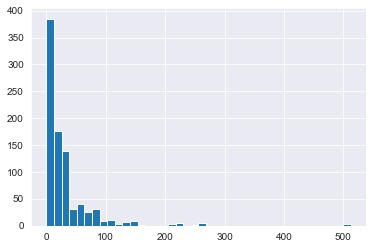

In [27]:
# Lets make a histogram to visualize Ticket Fares

df['Fare'].hist(bins=40)

### Dropping unnecessary columns and Encoding Categorical Data

In [28]:
x = df
x = x.drop(labels='Name',axis=1)
x = x.drop(labels='Ticket',axis=1)
x = x.drop(labels='Cabin',axis=1)
x = x.drop(labels='Survived',axis=1) # Dropping this as we are storing in y
x = x.drop(labels='PassengerId',axis=1)
x = x.drop(labels='Fare',axis=1)
x = x.drop(labels='Embarked',axis=1)
x = x.values
y = df.iloc[:,1].values

In [29]:
print(x)

[[3 'male' 22.0 1 0]
 [1 'female' 38.0 1 0]
 [3 'female' 26.0 0 0]
 ...
 [3 'female' 29.69911764705882 1 2]
 [1 'male' 26.0 0 0]
 [3 'male' 32.0 0 0]]


In [30]:
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoding',OneHotEncoder(), [1])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [32]:
print(x)

[[0.0 1.0 3 22.0 1 0]
 [1.0 0.0 1 38.0 1 0]
 [1.0 0.0 3 26.0 0 0]
 ...
 [1.0 0.0 3 29.69911764705882 1 2]
 [0.0 1.0 1 26.0 0 0]
 [0.0 1.0 3 32.0 0 0]]


### Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [34]:
print(x_train)

[[0.0 1.0 3 28.0 0 0]
 [1.0 0.0 3 17.0 4 2]
 [0.0 1.0 3 30.0 1 0]
 ...
 [0.0 1.0 3 29.69911764705882 0 0]
 [1.0 0.0 3 36.0 1 0]
 [0.0 1.0 2 60.0 1 1]]


In [35]:
print(y_train)

[0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0
 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 

In [36]:
print(x_test)

[[0.0 1.0 3 29.69911764705882 0 0]
 [0.0 1.0 3 29.69911764705882 0 0]
 [0.0 1.0 3 7.0 4 1]
 ...
 [0.0 1.0 3 19.0 0 0]
 [1.0 0.0 1 21.0 2 2]
 [1.0 0.0 3 4.0 1 1]]


In [37]:
print(y_test)

[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1
 1]


### Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
print(x_train)

[[-0.72705166  0.72705166  0.83012938 -0.14358693 -0.46037161 -0.47720996]
 [ 1.37541808 -1.37541808  0.83012938 -0.99275516  2.98532288  1.95619654]
 [-0.72705166  0.72705166  0.83012938  0.01080729  0.40105202 -0.47720996]
 ...
 [-0.72705166  0.72705166  0.83012938 -0.01241996 -0.46037161 -0.47720996]
 [ 1.37541808 -1.37541808  0.83012938  0.47398996  0.40105202 -0.47720996]
 [-0.72705166  0.72705166 -0.36497068  2.32672063  0.40105202  0.73949329]]


In [40]:
print(x_test)

[[-0.72705166  0.72705166  0.83012938 -0.01241996 -0.46037161 -0.47720996]
 [-0.72705166  0.72705166  0.83012938 -0.01241996 -0.46037161 -0.47720996]
 [-0.72705166  0.72705166  0.83012938 -1.76472627  2.98532288  0.73949329]
 ...
 [-0.72705166  0.72705166  0.83012938 -0.83836094 -0.46037161 -0.47720996]
 [ 1.37541808 -1.37541808 -1.56007074 -0.68396671  1.26247564  1.95619654]
 [ 1.37541808 -1.37541808  0.83012938 -1.99631761  0.40105202  0.73949329]]


### Training the Logistic Regression model on the Training set

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

### Checking Score 

In [42]:
from sklearn.metrics import accuracy_score
predict = classifier.predict(x_train)
score = accuracy_score(y_train,predict)

In [43]:
score

0.7829341317365269

In [44]:
predict = classifier.predict(x_test)
score = accuracy_score(y_test,predict)

In [45]:
score

0.7982062780269058

### Training set accuracy is 78.29% and Test set accuracy is 79.82%